<a href="https://colab.research.google.com/github/Abdullah-AlOwais/Tuwaiq/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(2030)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Tuwaiq/Week 2/2 - Foundations of Machine Learning/5- Weekly Project/RTA_Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [5]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [6]:
df.duplicated().sum()

0

In [7]:
#checking any values out of the ordinary
for i in df.columns:
      print('The column name',i)
      print(df[i].unique())
      print('\n----------------------------------------------\n')

The column name Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']

----------------------------------------------

The column name Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

----------------------------------------------

The column name Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']

----------------------------------------------

The column name Sex_of_driver
['Male' 'Female' 'Unknown']

----------------------------------------------

The column name Educational_level
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']

----------------------------------------------

The column name Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' nan 'Other']

----------------------------------------------

The column name Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']

---------------

In [8]:
'''
The column name Area_accident_occured
['Residential areas' 'Office areas' |'  Recreational areas'|
 ' Industrial areas' 'Other' ' Church areas' '  Market areas'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' |'Recreational areas'|]


The column name Age_band_of_casualty
['na' '31-50' '18-30' 'Under 18' 'Over 51' |'5'|]


The column name Fitness_of_casuality
['Normal' 'Deaf' 'Other' 'Blind' 'NormalNormal']

 '''
#i notice the in [Area_accident_occured, Age_band_of_casualty, Fitness_of_casuality] there are a duplicated values ot out of the ordinary values
#[('  Recreational areas' and ''Recreational areas''),'5', 'NormalNormal']

df['Area_accident_occured'].replace('  Recreational areas', 'Recreational areas', inplace=True)
df['Age_band_of_casualty'].replace('5', 'Under 18', inplace=True)
df['Fitness_of_casuality'].replace('NormalNormal', 'Normal', inplace=True)

#df[i].unique() -> to check if there any 'Unknown' value'
#replace the Unknown or unknown with the Null and then replace it with the mode
for i in df.columns:
  if ('Unknown' in df[i].unique()):
      df[i].replace('Unknown', np.nan, inplace=True)
  elif ('unknown' in df[i].unique()):
      df[i].replace('unknown', np.nan, inplace=True)




In [9]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,1548
Sex_of_driver,178
Educational_level,841
Vehicle_driver_relation,593
Driving_experience,862
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,6811


In [10]:

#df[i].isnull() -> to check if there any 'null' value'
#replace the Null and then replace it with the mode
for i in df.columns:
      print('The null Value in (',i,') is = ',df[i].isnull().sum())
      df[i].fillna(df[i].mode()[0],inplace=True)
      print(i,' mode= ',df[i].mode()[0])
      print('The null Value in (',i,') after filling is = ',df[i].isnull().sum())
      print('\n----------------------------------------------\n')

The null Value in ( Time ) is =  0
Time  mode=  15:30:00
The null Value in ( Time ) after filling is =  0

----------------------------------------------

The null Value in ( Day_of_week ) is =  0
Day_of_week  mode=  Friday
The null Value in ( Day_of_week ) after filling is =  0

----------------------------------------------

The null Value in ( Age_band_of_driver ) is =  1548
Age_band_of_driver  mode=  18-30
The null Value in ( Age_band_of_driver ) after filling is =  0

----------------------------------------------

The null Value in ( Sex_of_driver ) is =  178
Sex_of_driver  mode=  Male
The null Value in ( Sex_of_driver ) after filling is =  0

----------------------------------------------

The null Value in ( Educational_level ) is =  841
Educational_level  mode=  Junior high school
The null Value in ( Educational_level ) after filling is =  0

----------------------------------------------

The null Value in ( Vehicle_driver_relation ) is =  593
Vehicle_driver_relation  mode=  

In [11]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

In [13]:
df.sample(50)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
6012,17:25:00,Wednesday,18-30,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,2-5yrs,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No distancing,Serious Injury
435,12:53:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Public (12 seats),Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
5142,16:30:00,Monday,18-30,Male,Junior high school,Employee,Above 10yr,Long lorry,Owner,2-5yrs,...,Going straight,Driver or rider,Female,31-50,3,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
11184,10:30:00,Monday,Over 51,Male,Junior high school,Owner,5-10yr,Other,Owner,Above 10yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
11290,0:25:00,Sunday,31-50,Male,Junior high school,Owner,Below 1yr,Pick up upto 10Q,Owner,Above 10yr,...,Moving Backward,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
12091,19:31:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Stationwagen,Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
4877,8:15:00,Tuesday,18-30,Male,Junior high school,Owner,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
5174,16:55:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Stationwagen,Owner,2-5yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
6745,22:30:00,Sunday,31-50,Male,Junior high school,Owner,Above 10yr,Automobile,Owner,1-2yr,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
10800,9:55:00,Monday,Over 51,Male,High school,Owner,1-2yr,Automobile,Owner,5-10yrs,...,Other,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury


In [14]:
#changing some column's datatype

df.rename(columns={'Accident_severity': 'Accident_severity_degree'}, inplace=True)
severity_mapping = {
    'Slight Injury': 1,
    'Serious Injury': 2,
    'Fatal injury': 3
}
df['Accident_severity_degree'] = df['Accident_severity_degree'].map(severity_mapping)
df['Accident_severity_degree'] = df['Accident_severity_degree'].astype(int)

defect_mapping = {
    'No defect': 0,
    '7': 7,
    '5': 5
}

df['Defect_of_vehicle'] = df['Defect_of_vehicle'].map(defect_mapping).astype(int)

df['Casualty_severity'] = df['Casualty_severity'].replace('na', 0).astype(int)



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  int64 
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

In [16]:
df.describe()
#only numeric fields are returned.

,Defect_of_vehicle,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,Accident_severity_degree
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,0.057811,2.040679,1.548149,1.850926,1.167181
std,0.610028,0.688790,1.007179,1.413361,0.406082
min,0.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,0.000000,1.000000
50%,0.000000,2.000000,1.000000,3.000000,1.000000
75%,0.000000,2.000000,2.000000,3.000000,1.000000
max,7.000000,7.000000,8.000000,3.000000,3.000000


In [17]:
df.describe(exclude=[np.number])
#Exclude numeric fields.

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,...,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316
unique,1074,7,4,2,6,3,6,17,4,5,...,8,9,12,4,3,5,6,4,9,19
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,2-5yrs,...,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,na,Driver,Normal,Not a Pedestrian,No distancing
freq,120,2041,5819,11615,8460,10220,4225,4155,10941,8603,...,10355,8943,8554,4944,5253,4443,9120,12262,11390,2288


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

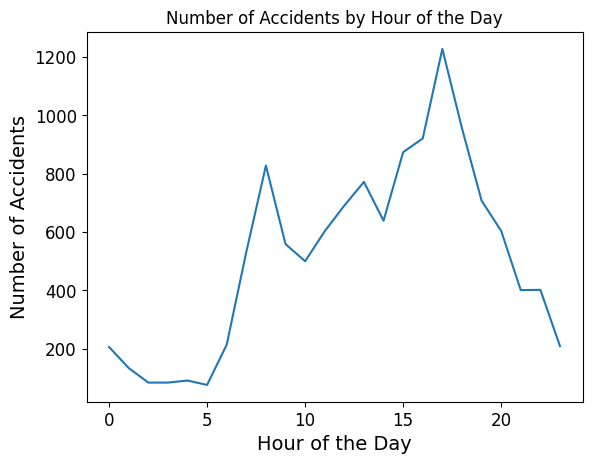

In [18]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Hour'] = df['Time'].dt.hour
numAPH = df.groupby('Hour').size()

sns.lineplot(x=numAPH.index, y=numAPH.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour of the Day')
plt.show()
#We can see that when the horu between 15 and 20 is the highest time the accidens happen in

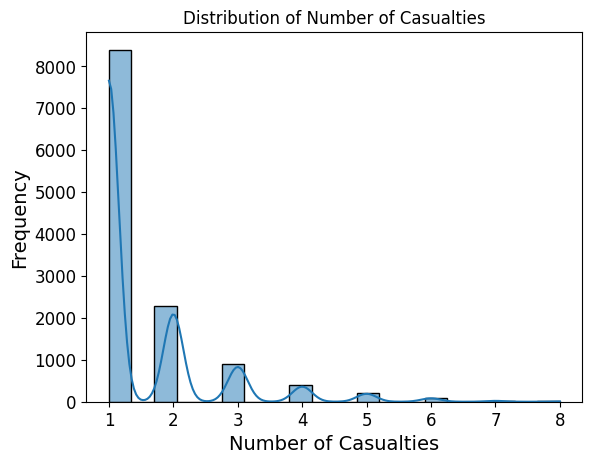

In [19]:
sns.histplot(df['Number_of_casualties'], bins=20, kde=True)
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Casualties')
plt.show()
#Distribution of Number of Casualties

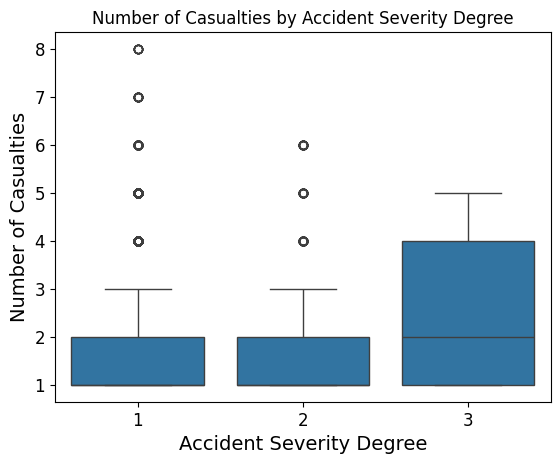

In [20]:
sns.boxplot(data=df, x='Accident_severity_degree', y='Number_of_casualties')
plt.xlabel('Accident Severity Degree')
plt.ylabel('Number of Casualties')
plt.title('Number of Casualties by Accident Severity Degree')
plt.show()
#the outer of Accident_severity_degree

<ipython-input-21-29b6d8d39698>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Day_of_week', palette='viridis')


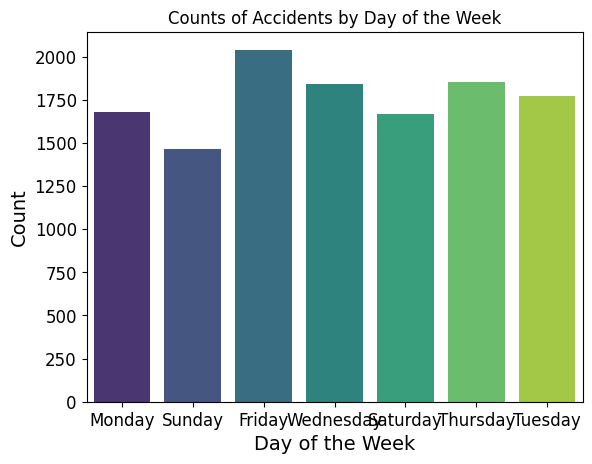

In [21]:
sns.countplot(data=df, x='Day_of_week', palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Counts of Accidents by Day of the Week')
plt.show()
# Friday, Thursday and Wednesday is the highest days

<ipython-input-22-12a4f3591554>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=casualties_sum, x='Accident_severity_degree', y='Number_of_casualties', palette='viridis')


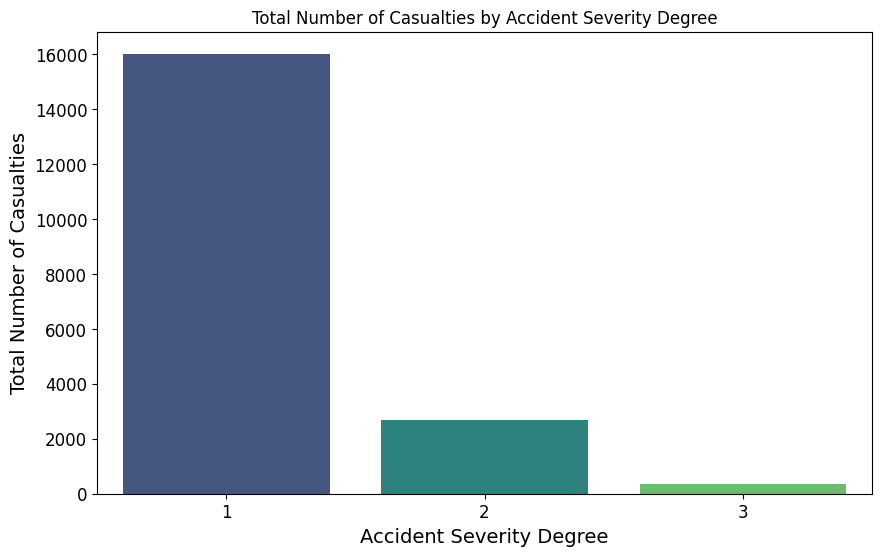

In [22]:

casualties_sum = df.groupby('Accident_severity_degree')['Number_of_casualties'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=casualties_sum, x='Accident_severity_degree', y='Number_of_casualties', palette='viridis')
plt.xlabel('Accident Severity Degree')
plt.ylabel('Total Number of Casualties')
plt.title('Total Number of Casualties by Accident Severity Degree')
plt.show()
#from this plot we can see that Fatal injury is very and rear case

<ipython-input-23-6db060e0e133>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type_of_vehicle', palette='viridis', order=df['Type_of_vehicle'].value_counts().index)


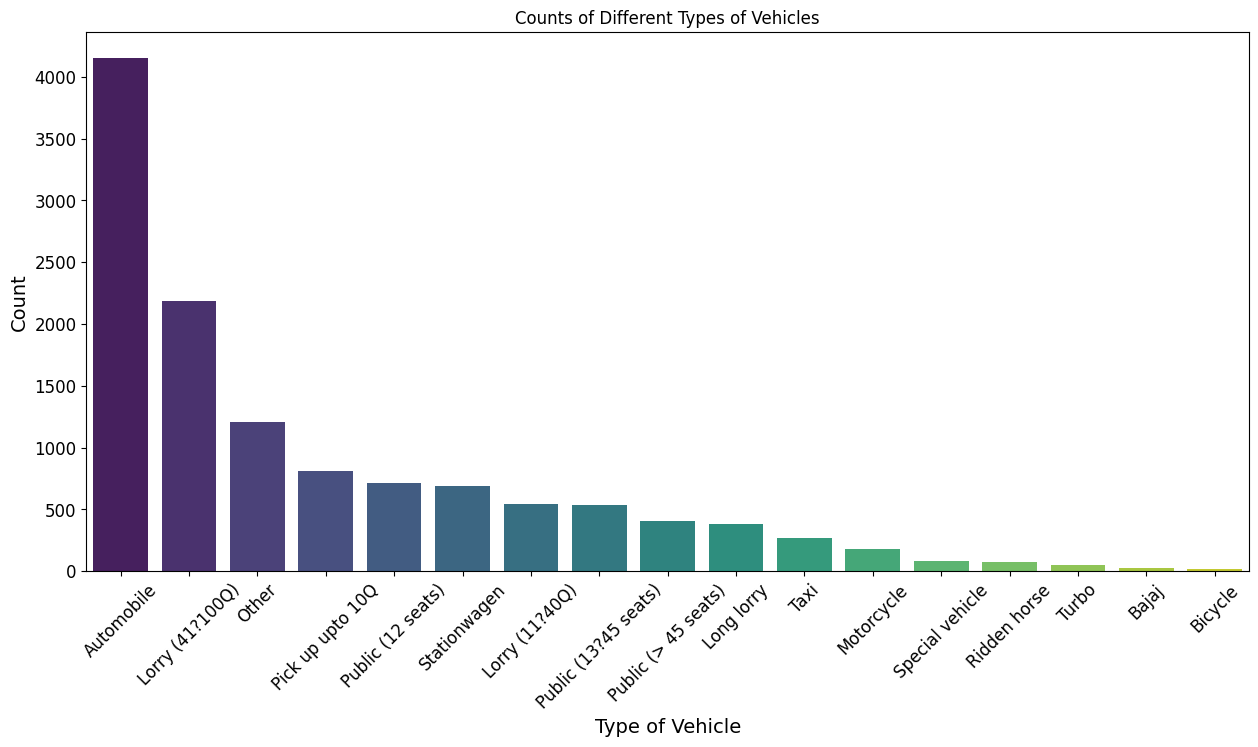

In [23]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='Type_of_vehicle', palette='viridis', order=df['Type_of_vehicle'].value_counts().index)
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.title('Counts of Different Types of Vehicles')
plt.xticks(rotation=45)
plt.show()
#from this plot we see that Bicycle is the least type of vechicles

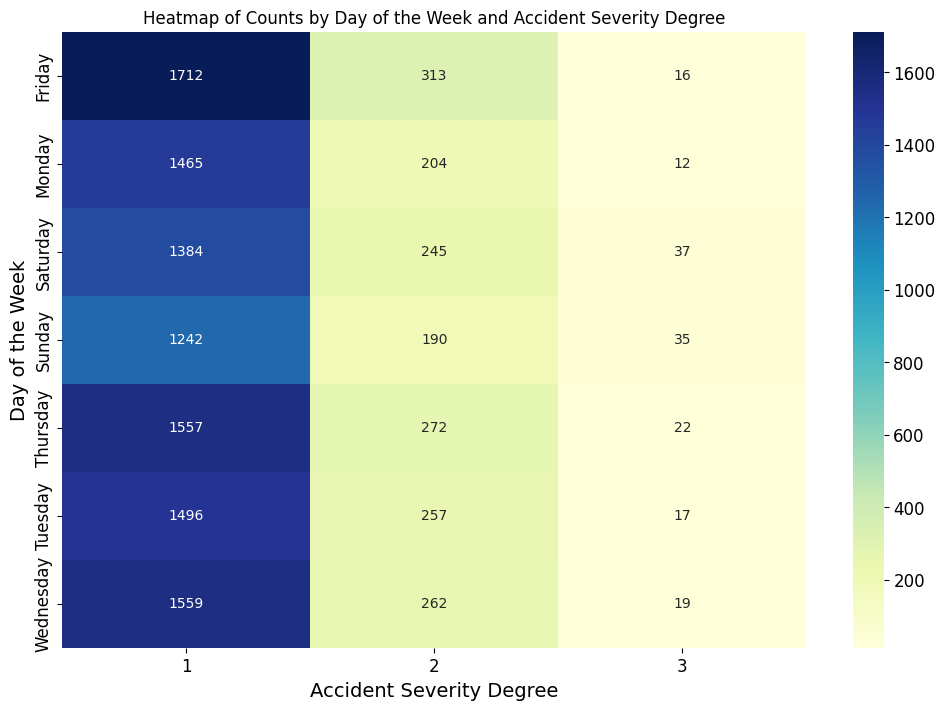

In [24]:
heatmap_data = df.pivot_table(index='Day_of_week', columns='Accident_severity_degree', aggfunc='size')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Counts by Day of the Week and Accident Severity Degree')
plt.xlabel('Accident Severity Degree')
plt.ylabel('Day of the Week')
plt.show()

#from this plot we see that the most accident happend with a high Accident Severity Degree was in Sunday


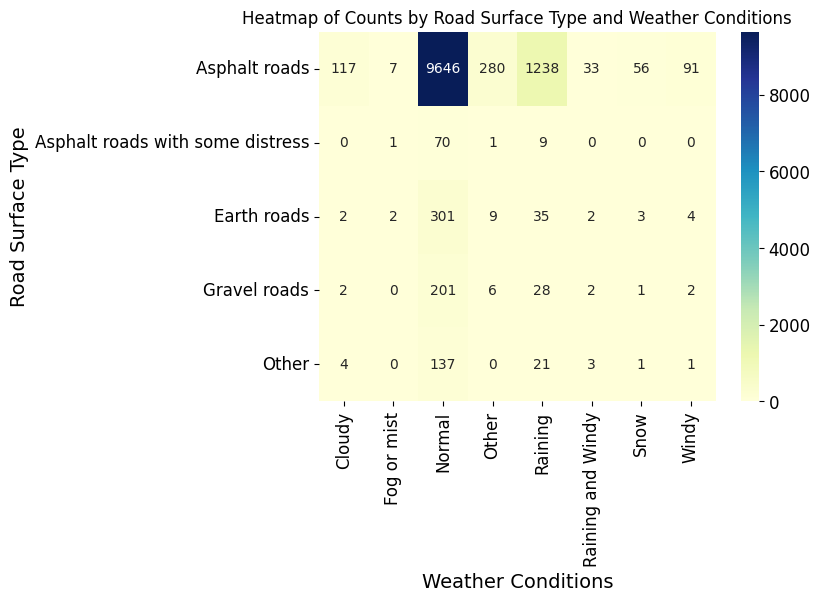

In [25]:

heatmap_data = df.pivot_table(index='Road_surface_type', columns='Weather_conditions', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Counts by Road Surface Type and Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Road Surface Type')
plt.show()

#from this plot we understand that most of the accident happend in Asphalt roads and when the weather is normal
#and the second conditions is Asphalt roads and when the weather is Raining


In [26]:
le = LabelEncoder()
features_to_encode = ['Age_band_of_driver', 'Sex_of_driver', 'Driving_experience',
                      'Type_of_vehicle', 'Area_accident_occured',
                      'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
                      'Weather_conditions', 'Type_of_collision', 'Pedestrian_movement']
for feature in features_to_encode:
    df[feature] = le.fit_transform(df[feature])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  int64         
 3   Sex_of_driver                12316 non-null  int64         
 4   Educational_level            12316 non-null  object        
 5   Vehicle_driver_relation      12316 non-null  object        
 6   Driving_experience           12316 non-null  int64         
 7   Type_of_vehicle              12316 non-null  int64         
 8   Owner_of_vehicle             12316 non-null  object        
 9   Service_year_of_vehicle      12316 non-null  object        
 10  Defect_of_vehicle            12316 non-null  int64         
 11  Area_accident_occured        12316 non-nu

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [27]:
#FeaTures =
FeaTures = [
    'Age_band_of_driver', 'Sex_of_driver', 'Driving_experience', 'Type_of_vehicle',
    'Area_accident_occured', 'Road_surface_type', 'Road_surface_conditions',
    'Light_conditions', 'Weather_conditions', 'Type_of_collision',
    'Number_of_vehicles_involved', 'Number_of_casualties', 'Pedestrian_movement','Accident_severity_degree'
]

dfTraining = df[FeaTures]
dfTraining

X=dfTraining
y=df['Accident_severity_degree']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
for i in FeaTures:
  scaler = MinMaxScaler()
  df[[i]] = scaler.fit_transform(df[[i]])

In [29]:
y_train.shape

(8621,)

In [30]:
X_train.shape

(8621, 14)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train, y_train)
log_reg_y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
accuracy = accuracy_score(y_test, log_reg_y_pred)
conf_matrix = confusion_matrix(y_test, log_reg_y_pred)
precision = precision_score(y_test, log_reg_y_pred, average='weighted')
recall = recall_score(y_test, log_reg_y_pred, average='weighted')
f1 = f1_score(y_test, log_reg_y_pred, average='weighted')

print('accuracy: ',accuracy)
print('----------------------\n')
print("Confusion Matrix:\n", conf_matrix)
print('----------------------\n')
print("Precision:", precision)
print('----------------------\n')
print("Recall:", recall)
print('----------------------\n')
print("F1 Score:", f1)


accuracy:  1.0
----------------------

Confusion Matrix:
 [[3112    0    0]
 [   0  528    0]
 [   0    0   55]]
----------------------

Precision: 1.0
----------------------

Recall: 1.0
----------------------

F1 Score: 1.0


#### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)
DTF_y_pred = tree_clf.predict(X_test)

#### Support Vector Machine (SVM)

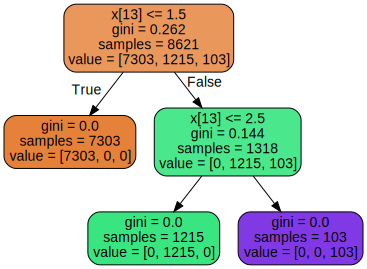

In [34]:
# Import necessary libraries
from graphviz import Source
from sklearn.tree import export_graphviz
import os
IMAGES_PATH = '/content/sample_data'

# Export the trained Decision Tree classifier as a .dot file
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "tree_clf.dot"),  # Output file path
    rounded=True,  # Rounded corners in the decision nodes
    filled=True  # Fill the decision nodes with colors representing classes
)

# Visualize the Decision Tree using Graphviz
Source.from_file(os.path.join(IMAGES_PATH, "tree_clf.dot"))


In [35]:
accuracy = accuracy_score(y_test, DTF_y_pred)
conf_matrix = confusion_matrix(y_test, DTF_y_pred)
precision = precision_score(y_test, DTF_y_pred, average='weighted')
recall = recall_score(y_test, DTF_y_pred, average='weighted')
f1 = f1_score(y_test, DTF_y_pred, average='weighted')

print('accuracy: ',accuracy)
print('----------------------\n')
print("Confusion Matrix:\n", conf_matrix)
print('----------------------\n')
print("Precision:", precision)
print('----------------------\n')
print("Recall:", recall)
print('----------------------\n')
print("F1 Score:", f1)


accuracy:  1.0
----------------------

Confusion Matrix:
 [[3112    0    0]
 [   0  528    0]
 [   0    0   55]]
----------------------

Precision: 1.0
----------------------

Recall: 1.0
----------------------

F1 Score: 1.0


In [36]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=1.0)
svm_clf.fit(X_train, y_train)
SVC_y_pred = svm_clf.predict(X_test)


In [37]:
accuracy = accuracy_score(y_test, SVC_y_pred)
conf_matrix = confusion_matrix(y_test, SVC_y_pred)
precision = precision_score(y_test, SVC_y_pred, average='weighted')
recall = recall_score(y_test, SVC_y_pred, average='weighted')
f1 = f1_score(y_test, SVC_y_pred, average='weighted')

print('accuracy: ',accuracy)
print('----------------------\n')
print("Confusion Matrix:\n", conf_matrix)
print('----------------------\n')
print("Precision:", precision)
print('----------------------\n')
print("Recall:", recall)
print('----------------------\n')
print("F1 Score:", f1)


accuracy:  1.0
----------------------

Confusion Matrix:
 [[3112    0    0]
 [   0  528    0]
 [   0    0   55]]
----------------------

Precision: 1.0
----------------------

Recall: 1.0
----------------------

F1 Score: 1.0


#### K-Neighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)
y_knn_pred = knn_clf.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_knn_pred)
conf_matrix = confusion_matrix(y_test, y_knn_pred)
precision = precision_score(y_test, y_knn_pred, average='weighted')
recall = recall_score(y_test, y_knn_pred, average='weighted')
f1 = f1_score(y_test, y_knn_pred, average='weighted')

print('accuracy: ',accuracy)
print('----------------------\n')
print("Confusion Matrix:\n", conf_matrix)
print('----------------------\n')
print("Precision:", precision)
print('----------------------\n')
print("Recall:", recall)
print('----------------------\n')
print("F1 Score:", f1)


accuracy:  0.8776725304465494
----------------------

Confusion Matrix:
 [[3089   23    0]
 [ 378  150    0]
 [  20   31    4]]
----------------------

Precision: 0.8660452312601443
----------------------

Recall: 0.8776725304465494
----------------------

F1 Score: 0.8490698537062462


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: